<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-A01793038-Jonathan_Garza/blob/main/Actividades%20Semana%208/Actividad_de_semana_8_kmeans_target_Jonathan_Garza.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Instituto Tecnológico y de Estudios Superiores de Monterrey**

Maestría en Inteligencia Artificial Aplicada (MNA)

Ciencia y Analítica de Datos

**Actividad de Semana 8: KMeans**

**Jonathan Garza Bennet - A01793038**

Este notebook se basa en información de target
![imagen.png](https://www.america-retail.com/static//2020/12/target01.jpg)


Ahora imagina que somos parte del equipo de data science de la empresa Target, una de las tiendas con mayor presencia en Estados Unidos. El departamento de logistica acude a nosotros para saber donde le conviene poner sus almacenes, para que se optimice el gasto de gasolina, los tiempos de entrega de los productos y se disminuyan costos. Para ello, nos pasan los datos de latitud y longitud de cada una de las tiendas.

https://www.kaggle.com/datasets/saejinmahlauheinert/target-store-locations?select=target-locations.csv

Si quieres saber un poco más de graficas geográficas consulta el siguiente notebook
https://colab.research.google.com/github/QuantEcon/quantecon-notebooks-datascience/blob/master/applications/maps.ipynb#scrollTo=uo2oPtSCeAOz

In [74]:
! pip install qeds fiona geopandas xgboost gensim folium pyLDAvis descartes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [75]:
import pandas as pd
import numpy as np
from tqdm import tqdm
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import geopandas

Importa la base de datos

In [76]:
url="https://raw.githubusercontent.com/marypazrf/bdd/main/target-locations.csv"
df=pd.read_csv(url)

Exploremos los datos.

In [77]:

df.head()


,name,latitude,longitude,address,phone,website
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1839 entries, 0 to 1838
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       1839 non-null   object 
 1   latitude   1839 non-null   float64
 2   longitude  1839 non-null   float64
 3   address    1839 non-null   object 
 4   phone      1839 non-null   object 
 5   website    1839 non-null   object 
dtypes: float64(2), object(4)
memory usage: 86.3+ KB


**Definición de Latitud y Longitud**

**Latitud** Es la distancia en grados, minutos y segundos que hay con respecto al paralelo principal, que es el ecuador (0º). La latitud puede ser norte y sur.

**Longitud**: Es la distancia en grados, minutos y segundos que hay con respecto al meridiano principal, que es el meridiano de Greenwich (0º).La longitud puede ser este y oeste.

In [79]:
latlong=df[["latitude","longitude"]]

¡Visualizemos los datos!, para empezar a notar algún patron. 

A simple vista pudieramos pensar que tenemos algunos datos atípicos u outliers, pero .... no es así, simplemente esta grafica no nos está dando toda la información.

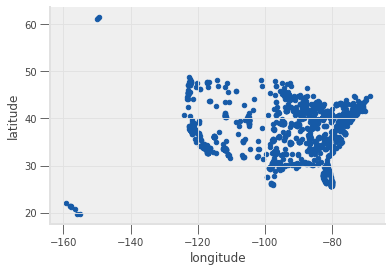

In [80]:
#extrae los datos interesantes
latlong.plot.scatter( "longitude","latitude")

In [81]:
latlong.describe()

,latitude,longitude
count,1839.000000,1839.000000
mean,37.791238,-91.986881
std,5.272299,16.108046
min,19.647855,-159.376962
25%,33.882605,-98.268828
50%,38.955432,-87.746346
75%,41.658341,-80.084833
max,61.577919,-68.742331


Para entender un poco más, nos auxiliaremos de una librería para graficar datos geográficos. Esto nos ayudara a tener un mejor entendimiento de ellos.




In [82]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

from shapely.geometry import Point

%matplotlib inline
# activate plot theme
import qeds
qeds.themes.mpl_style();

In [83]:
df["Coordinates"] = list(zip(df.longitude, df.latitude))
df["Coordinates"] = df["Coordinates"].apply(Point)
df.head()

,name,latitude,longitude,address,phone,website,Coordinates
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276,POINT (-86.80417369999999 33.2242254)
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375,POINT (-86.98977789999999 33.3345501)
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274,POINT (-87.89593169999999 30.6028747)
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084,POINT (-86.9715595 34.5601477)
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468,POINT (-85.4464222 31.2660613)


In [84]:
gdf = gpd.GeoDataFrame(df, geometry="Coordinates")
gdf.head()

,name,latitude,longitude,address,phone,website,Coordinates
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276,POINT (-86.80417 33.22423)
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375,POINT (-86.98978 33.33455)
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274,POINT (-87.89593 30.60287)
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084,POINT (-86.97156 34.56015)
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468,POINT (-85.44642 31.26606)


In [85]:
#mapa

world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")

world.head()

,pop_est,continent,name,gdp_md_est,geometry
iso_a3,,,,,
FJI,920938,Oceania,Fiji,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
TZA,53950935,Africa,Tanzania,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
ESH,603253,Africa,W. Sahara,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
CAN,35623680,North America,Canada,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
USA,326625791,North America,United States of America,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [86]:
#graficar el mapa
world.name.unique()

array(['Fiji', 'Tanzania', 'W. Sahara', 'Canada',
       'United States of America', 'Kazakhstan', 'Uzbekistan',
       'Papua New Guinea', 'Indonesia', 'Argentina', 'Chile',
       'Dem. Rep. Congo', 'Somalia', 'Kenya', 'Sudan', 'Chad', 'Haiti',
       'Dominican Rep.', 'Russia', 'Bahamas', 'Falkland Is.', 'Norway',
       'Greenland', 'Fr. S. Antarctic Lands', 'Timor-Leste',
       'South Africa', 'Lesotho', 'Mexico', 'Uruguay', 'Brazil',
       'Bolivia', 'Peru', 'Colombia', 'Panama', 'Costa Rica', 'Nicaragua',
       'Honduras', 'El Salvador', 'Guatemala', 'Belize', 'Venezuela',
       'Guyana', 'Suriname', 'France', 'Ecuador', 'Puerto Rico',
       'Jamaica', 'Cuba', 'Zimbabwe', 'Botswana', 'Namibia', 'Senegal',
       'Mali', 'Mauritania', 'Benin', 'Niger', 'Nigeria', 'Cameroon',
       'Togo', 'Ghana', "Côte d'Ivoire", 'Guinea', 'Guinea-Bissau',
       'Liberia', 'Sierra Leone', 'Burkina Faso', 'Central African Rep.',
       'Congo', 'Gabon', 'Eq. Guinea', 'Zambia', 'Malawi', 'M

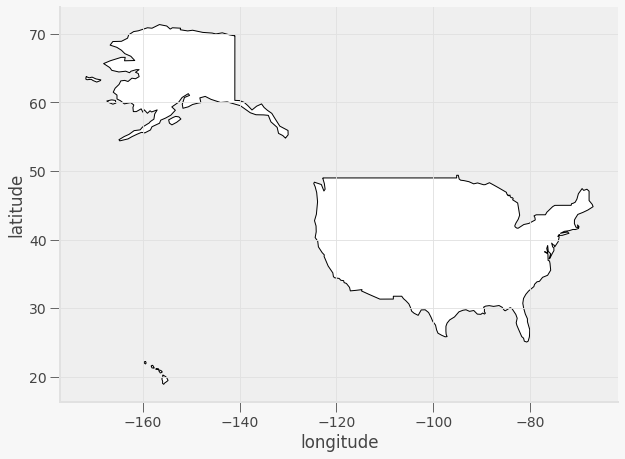

In [87]:
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot SA.
world.query("name == 'United States of America'").plot(ax=gax, edgecolor='black',color='white')

# By the way, if you haven't read the book 'longitude' by Dava Sobel, you should...
gax.set_xlabel('longitude')
gax.set_ylabel('latitude')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

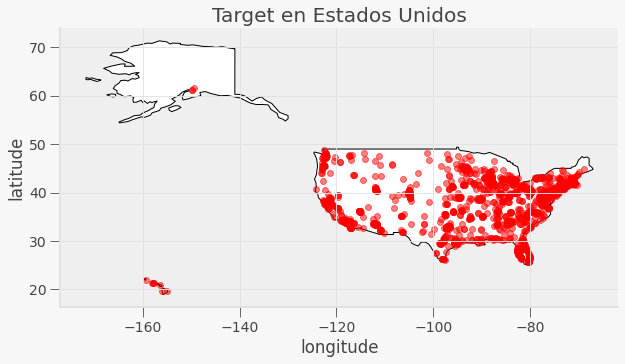

In [88]:
# Step 3: Plot the cities onto the map
# We mostly use the code from before --- we still want the country borders plotted --- and we
# add a command to plot the cities
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot, well,
# South America.
world.query("name == 'United States of America'").plot(ax = gax, edgecolor='black', color='white')

# This plot the cities. It's the same syntax, but we are plotting from a different GeoDataFrame.
# I want the cities as pale red dots.
gdf.plot(ax=gax, color='red', alpha = 0.5)

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Target en Estados Unidos')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

¿qué tal ahora?, tiene mayor sentido verdad, entonces los datos lejanos no eran atípicos, de aquí la importancia de ver los datos con el tipo de gráfica correcta.

Ahora sí, implementa K means a los datos de latitud y longitud :) y encuentra donde colocar los almacenes. 

Nota: si te llama la atención implementar alguna otra visualización con otra librería, lo puedes hacer, no hay restricciones.

In [89]:
#Librerías a utilizar
from sklearn.cluster import KMeans
# import module
from geopy.geocoders import Nominatim
from shapely.geometry import Point

**Encuentra el numero ideal de almacenes**

A continuación se realiza una lista de resultados de la incercia producida con modelos de KMeans con distinto número de clusters

In [90]:
#Rango de clusters a probar
clusters = range(1,100)

#Se crea variable con latitud y longitud
X_latlong = df[['latitude','longitude']]

#Lista de Inercias
inertias = []

#Ciclo para el cálculo de KMeans con distinto número de clusters
for cluster in clusters:

  #Se define el modelo con número variable de clusters
  modelo = KMeans(n_clusters =cluster)

  #Se entrena el modelo
  modelo.fit(X_latlong)

  #Se añaden los resultados a lalista
  inertias.append(modelo.inertia_)

Se grafican los resultados para determinar el codo

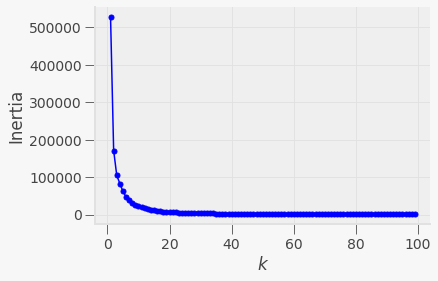

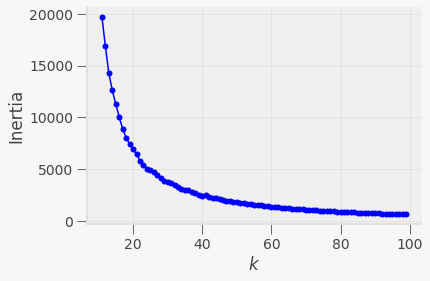

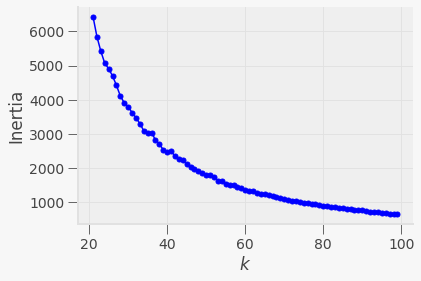

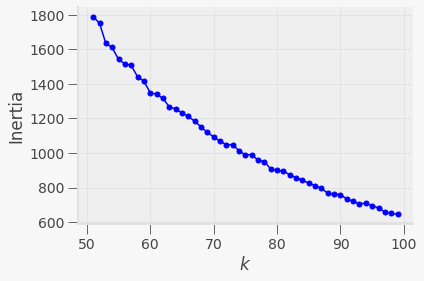

In [91]:
plt.xlabel("$k$")
plt.ylabel("Inertia")
plt.plot(clusters, inertias, 'bo-', markersize = 5)
plt.show()
plt.xlabel("$k$")
plt.ylabel("Inertia")
plt.plot(clusters[10:100], inertias[10:100], 'bo-', markersize = 5)
plt.show()
plt.xlabel("$k$")
plt.ylabel("Inertia")
plt.plot(clusters[20:100], inertias[20:100], 'bo-', markersize = 5)
plt.show()
plt.xlabel("$k$")
plt.ylabel("Inertia")
plt.plot(clusters[50:100], inertias[50:100], 'bo-', markersize = 5)
plt.show()

***¿Cómo elegiste el número de almacenes?, justifica tu respuesta técnicamente.***

La determinación del codo no es sencilla debido a la escala de la gráfica en el rango total de las pruebas. Se realizaron varios acercamientos hasta que la tendencia de reducción de la incercia comenzara a ser lineal en vez de logarítmica. Alrededor del 50, se puede apreciar una reducción de la incercia más lineal, por lo que se determina como codo y por lo tanto como número de clusters más óptimo.

***Encuentra las latitudes y longitudes de los almacenes, ¿qué ciudad es?, ¿a cuantas tiendas va surtir?, ¿sabes a que distancia estará?***

In [92]:
#Se establece el modelo con el número óptimo de clusters
modelo_optimo = KMeans(n_clusters = 50)

#Se entrena al modelo
modelo_optimo.fit(X_latlong)

#Ubicación de almacenes
almacenes_latlong = modelo_optimo.cluster_centers_

#Se crea un dataframe de pandas con las coordenadas de los centros
df_almacenes_latlong = pd.DataFrame(almacenes_latlong, columns = ['latitude','longitude'])

#Se crea una nueva columna con las coordenadas combinadas
df_almacenes_latlong["Coordinates"] = list(zip(df_almacenes_latlong.longitude, df_almacenes_latlong.latitude))

#Se formatea la columna como un punto
df_almacenes_latlong["Coordinates"] = df_almacenes_latlong["Coordinates"].apply(Point)

#Se despliega encabezado
df_almacenes_latlong.head()

,latitude,longitude,Coordinates
0,41.047379,-73.774812,POINT (-73.77481187372881 41.04737921440678)
1,41.106654,-111.983256,POINT (-111.98325574117646 41.10665394117647)
2,39.172540,-85.219723,POINT (-85.21972266222222 39.17254008444444)
3,36.310956,-97.235350,POINT (-97.23535006666667 36.310956242857145)
4,20.945428,-157.312251,POINT (-157.31225085 20.945427712500003)


In [93]:
#Se transforma a Geografic Pandas
gdf_almacenes_latlong = gpd.GeoDataFrame(df_almacenes_latlong, geometry="Coordinates")

#Se despliega encabezado
gdf_almacenes_latlong.head()

,latitude,longitude,Coordinates
0,41.047379,-73.774812,POINT (-73.77481 41.04738)
1,41.106654,-111.983256,POINT (-111.98326 41.10665)
2,39.172540,-85.219723,POINT (-85.21972 39.17254)
3,36.310956,-97.235350,POINT (-97.23535 36.31096)
4,20.945428,-157.312251,POINT (-157.31225 20.94543)


Después de determinar las coordenadas de los almacenes, se procede a graficarlos sobre el mismo mapa utilizado anteriormente para una mejor visualización.

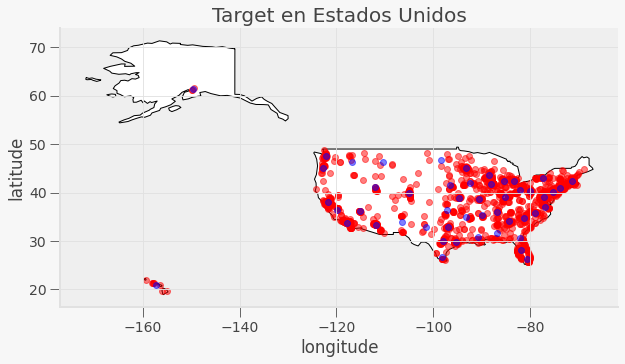

In [94]:
# Step 3: Plot the cities onto the map
# We mostly use the code from before --- we still want the country borders plotted --- and we
# add a command to plot the cities
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot, well,
# South America.
world.query("name == 'United States of America'").plot(ax = gax, edgecolor='black', color='white')

# This plot the cities. It's the same syntax, but we are plotting from a different GeoDataFrame.
# I want the cities as pale red dots.
gdf.plot(ax=gax, color='red', alpha = 0.5)

#Coordenadas de los almacenes
gdf_almacenes_latlong.plot(ax=gax, color='blue', alpha = 0.5)

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Target en Estados Unidos')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

Se observa que los centros de cluster de distribuyen adecuadamente dependiendo de la concentración y distancia entre las tiendas y se procede a determinar el número de tiendas por almacén.

El número de tiendas por cluster es:
Tiendas por Cluster
8                      120
0                      118
10                     100
12                      84
24                      75
19                      74
32                      73
5                       70
6                       57
20                      55
22                      53
13                      49
42                      46
18                      45
34                      45
9                       45
2                       45
15                      40
21                      40
36                      38
23                      35
44                      33
11                      31
26                      29
29                      29
38                      26
45                      26
33                      25
37                      24
48                      23
47                      23
40                      22
17                      22
28                      21
3                       2

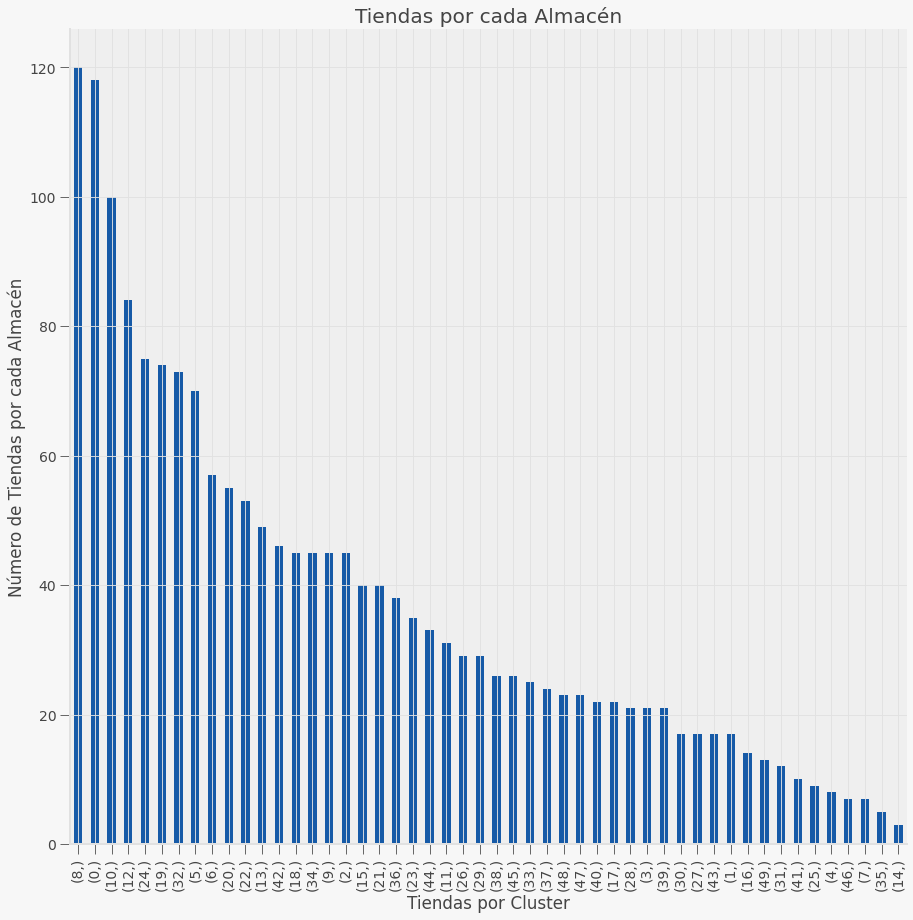

In [95]:
#Se obtienen los números de los centros de los clusters
cluster_tiendas = modelo_optimo.predict(X_latlong)

#Se crea un dataframe con los resultados
df_cluster_tiendas = pd.DataFrame(cluster_tiendas, columns = ['Tiendas por Cluster'])

#Se despliegan los resultados
print('El número de tiendas por cluster es:\n{}'.format(df_cluster_tiendas.value_counts()))

#Se realiza una gráfica de barras con los resultados
plt.subplots(figsize=(15,15))
plt.title('Tiendas por cada Almacén')
plt.ylabel('Número de Tiendas por cada Almacén')
df_cluster_tiendas.value_counts().plot(kind='bar')
plt.show()

Se utiliza el método Nominatim de geopy.geocoders, para obtener las ciudades, pueblos y/o condandos correspondientes a las coordenadas de los almacenes.

In [96]:
# initialize Nominatim API
geolocator = Nominatim(user_agent="geoapiExercises")

#Listas para guardar los resultados
county_list = []
city_list = []
town_list = []
state_list = []
country_list = []
code_list = []
zipcode_list = []
tiendas_cluster_list = []
 
#Ciclo para lá búsqueda de la información de las coordenadas 
for i in range(0, len(df_almacenes_latlong)):
 
  # Latitude & Longitude input
  Latitude = str(df_almacenes_latlong['latitude'][i])
  Longitude = str(df_almacenes_latlong['longitude'][i])

  location = geolocator.reverse(Latitude+","+Longitude)
 
  address = location.raw['address']
 
  #Extraer los resultados y asignarlos a variables individuales
  county = address.get('county', '')
  city = address.get('city', '')
  town = address.get('town', '')
  state = address.get('state', '')
  country = address.get('country', '')
  code = address.get('country_code')
  zipcode = address.get('postcode')

  #Guardar los resultados en las listas
  county_list.append(county)
  city_list.append(city)
  town_list.append(town)
  state_list.append(state)
  country_list.append(country)
  code_list.append(code)
  zipcode_list.append(zipcode)
  #tiendas_cluster_list.append(tiendas_cluster)

#Crear nuevas columnas en el dataframe con los resultados
df_almacenes_latlong['County'] = county_list
df_almacenes_latlong['City'] = city_list
df_almacenes_latlong['Town'] = town_list
df_almacenes_latlong['State'] = state_list
df_almacenes_latlong['Country'] = country_list
df_almacenes_latlong['Code'] = code_list
df_almacenes_latlong['Zipcode'] = zipcode_list

#Obtener el número de almacén correspondiente a cada tienda
tiendas_cluster = modelo_optimo.predict(df_almacenes_latlong[['latitude','longitude']])

#Contar el número de tiendas por almacén
tiendas_por_cluster = df_cluster_tiendas.value_counts()

#Asignar a una nueva columna
df_almacenes_latlong['Cantidad de Tiendas'] = np.ravel(tiendas_por_cluster[tiendas_cluster])

#Desplegar resultados
df_almacenes_latlong

,latitude,longitude,Coordinates,County,City,Town,State,Country,Code,Zipcode,Cantidad de Tiendas
0,41.047379,-73.774812,POINT (-73.77481 41.04738),Westchester County,,,New York,United States,us,10603,118
1,41.106654,-111.983256,POINT (-111.98326 41.10665),Davis County,,,Utah,United States,us,84056,17
2,39.172540,-85.219723,POINT (-85.21972 39.17254),Ripley County,,,Indiana,United States,us,47037,45
3,36.310956,-97.235350,POINT (-97.23535 36.31096),Noble County,,,Oklahoma,United States,us,73077,21
4,20.945428,-157.312251,POINT (-157.31225 20.94543),,,,,United States,us,None,8
5,38.052805,-121.747958,POINT (-121.74796 38.05281),Sacramento County,,,California,United States,us,94571,70
6,28.238199,-81.878956,POINT (-81.87896 28.23820),Polk County,,,Florida,United States,us,None,57
7,46.710258,-98.325878,POINT (-98.32588 46.71026),Barnes County,,,North Dakota,United States,us,None,7
8,33.795171,-117.799448,POINT (-117.79945 33.79517),Orange County,Orange,,California,United States,us,92869,120
9,29.890428,-95.362792,POINT (-95.36279 29.89043),Harris County,,Aldine,Texas,United States,us,77093,45


Se agregan las coordenadas del almacén correspondiente a cada tienda en el dataframe original

In [97]:
#Se asigna el número de almacén a una columna
gdf['Almacen'] = cluster_tiendas

#Se inicializan listas vacías para las coordenadas
latitude_almacen = []
longitude_almacen = []

#Se inicia ciclo para asignar las coordenadas del almacén correspondiente a cada tienda
for num_almacen in cluster_tiendas:

  #Se añaden a la lista los resultados
  latitude_almacen.append(almacenes_latlong[num_almacen,0])
  longitude_almacen.append(almacenes_latlong[num_almacen,1])

#Se crean nuevas columnas en el daframe con las coordenadas
gdf['Latitude Almacen'] = latitude_almacen
gdf['Longitude Almacen'] = longitude_almacen

#Se crea una nueva columna con las coordenadas combinadas
gdf["Coordinates Almacen"] = list(zip(gdf["Longitude Almacen"], gdf["Latitude Almacen"]))

#Se formatea la columna como un punto
gdf["Coordinates Almacen"] = gdf["Coordinates Almacen"].apply(Point)

gdf.head()

,name,latitude,longitude,address,phone,website,Coordinates,Almacen,Latitude Almacen,Longitude Almacen,Coordinates Almacen
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276,POINT (-86.80417 33.22423),37,31.722797,-86.833404,POINT (-86.83340394583333 31.722796970833336)
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375,POINT (-86.98978 33.33455),37,31.722797,-86.833404,POINT (-86.83340394583333 31.722796970833336)
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274,POINT (-87.89593 30.60287),37,31.722797,-86.833404,POINT (-86.83340394583333 31.722796970833336)
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084,POINT (-86.97156 34.56015),17,36.069796,-86.868475,POINT (-86.86847487272726 36.069795522727276)
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468,POINT (-85.44642 31.26606),37,31.722797,-86.833404,POINT (-86.83340394583333 31.722796970833336)


Se utiliza una proyección al sistema global de coordenadas y posteriormente a el área de Estados Unidos para calcular la distancia entre todas las tiendas y su almacén.

In [98]:
#Se inicia lista vacía para el cálculo de la distancia entre la tienda y su almacén
distancia_almacenes = []

#Ciclo para calcular la distacia entre las coordenadas del almacén y la tienda
for i in range(0, len(gdf)):

  #Se asignan los puntos para el cálculo en el ciclo actual
  pnt1 = gdf['Coordinates Almacen'][i]
  pnt2 = gdf['Coordinates'][i]

  #Se realiza proyección al sistema global de coordenadas
  #lon, lat coordinate system (EPSG:4326 or WGS 84). 
  points_df = gpd.GeoDataFrame({'geometry': [pnt1, pnt2]}, crs='EPSG:4326')

  #Se realiza proyección a Estados Unidos
  #United States: EPSG:2163 Sri Lanka: EPSG:5234
  points_df = points_df.to_crs('EPSG:2163')
  points_df2 = points_df.shift() #Se realiza un shift en el dataframe por 1 para alinear pnt1 con pnt2
  
  #Se calcula la distancia
  distancia_almacen=points_df.distance(points_df2)

  #Se almacena el resultado en la lista y se realiza el cambio de unidades de metros a millas
  distancia_almacenes.append(np.round(distancia_almacen[1]*(1.609344/1000),2))

#Se crea nueva columna con los resultados de las distancias entre las tiendas y los almacenes
gdf['Distancia Almacen Millas'] = distancia_almacenes

#Se despliega gdf
gdf

,name,latitude,longitude,address,phone,website,Coordinates,Almacen,Latitude Almacen,Longitude Almacen,Coordinates Almacen,Distancia Almacen Millas
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276,POINT (-86.80417 33.22423),37,31.722797,-86.833404,POINT (-86.83340394583333 31.722796970833336),267.94
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375,POINT (-86.98978 33.33455),37,31.722797,-86.833404,POINT (-86.83340394583333 31.722796970833336),288.04
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274,POINT (-87.89593 30.60287),37,31.722797,-86.833404,POINT (-86.83340394583333 31.722796970833336),260.40
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084,POINT (-86.97156 34.56015),17,36.069796,-86.868475,POINT (-86.86847487272726 36.069795522727276),270.59
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468,POINT (-85.44642 31.26606),37,31.722797,-86.833404,POINT (-86.83340394583333 31.722796970833336),225.94


**Adicionalmente, en el notebook notaras que al inicio exploramos los datos y los graficamos de manera simple, después nos auxiliamos de una librería de datos geográficos.**

***¿qué librerías nos pueden ayudar a graficar este tipo de datos?***

A continuación se enlistan algunas librerías para realizar y graficar datos geoespaciales en Python:

1. Geopandas - utilizada en este notebook para trabajar con dataframes geoespaciales y realizar gráficos sobre mapas
2. geoplot
3. Shapely - utilizada en este notebook para el cálculo de las distancias y creación de puntos geográficos
4. ArcPy
5. GDAL

***¿Consideras importante que se grafique en un mapa?, ¿por qué?***
Sí lo considero importante debido a que facilita la visualización de los datos geográficos ayudando a dimensionar su ubicación sobre los contornos de un mapa. También ayuda a realizar las proyecciones correctas de las coordenadas geoides planisferios conservando la correcta relación entre las distancias no deformadas. También nos facilita la correcta agrupación visual de los datos, como se observó en este ejemplo; los datos que originalmente parecían outliers, resultaron ser parté de Estados Unidos pero en sus territorios en Alaska y Hawaii, corrigiendo la premisa original errónea.

**Agrega las conclusiones**

Con esta práctica se logró comprender el método de aprendizaje no supervisado de Kmeans. El método logra agrupar y clasificar datos de forma automática sin necesidad de tener un conjunto de datos de referencia para basar el entrenamiento del modelo. En el caso de esta práctica, se logró de manera exitosa agrupar en clusters la ubicación de las Tiendas Target con el objetivo de localizar de la forma más eficiente los almacenes encargado de realizar la distribución de los productos. Se pudo calcular el número óptimo de los anteriores por medio de la determinación del codo en la gráfica de la incercia contra el número de clusters y, posteriormente, se pudo verificar gráficamente que la distribución de los almacenes corresponde a la ubicación y la desnsidad de las tiendas alrededor de todo el territorio de Estados Unidos. Con toda la información anterior, se logró determinar la ciudad, pueblo o condado en el que se encuentra ubicado cada almacén, la cantidad de tiendas que surtiría cada almacén y la distancia entre cada almacén y su tienda correspondiente en millas.